## 상태 업데이트 하기
- **HumanMassage**: 사용자(사람)의 메세지(질문)
- **AIMessage**: AI(LLM)의 메시지(답변)
- **AnyMessages**: 위 메시지들을 포함하는 메시지

In [6]:
 from langchain_core.messages import AnyMessage
 from typing_extensions import TypedDict

 class State(TypedDict):
    messages: list[AnyMessage] # messages는 AnyMessage 객체들의 리스트이다.

In [11]:
from langchain_core.messages import AIMessage

def node(state: State):
    messages = state['messages']
    new_msg = AIMessage('안녕하세요, 무엇을 도와드릴까요?')

    # return {'messages': new_msg} # 기존 메세지를 대처(덮어쓰기 방식)
    return {'messages': messages + [new_msg]} # 기존 메시지 형식에 새로운 메시지 형식을 합침.

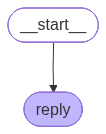

In [12]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)
graph_builder.add_node('reply', node)
graph_builder.set_entry_point('reply')
graph = graph_builder.compile()

graph


In [13]:
from langchain_core.messages import HumanMessage

result = graph.invoke({'messages': [HumanMessage('안녕')]})
result

{'messages': [HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}),
  AIMessage(content='안녕하세요, 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={})]}

## 대화 메시지 상태 누적하기
```from langgraph.graph.message import add_messages```

In [14]:
from typing_extensions import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [15]:
def node(state: State):
    messages = state['messages']
    new_msg = AIMessage('안녕하세요, 무엇을 도와드릴까요?')

    return {'messages': new_msg}

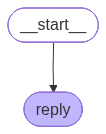

In [16]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)
graph_builder.add_node('reply', node)
graph_builder.set_entry_point('reply')  
graph = graph_builder.compile()

graph

In [20]:
# input_msg = {'role': 'user', 'content': '안녕'}
# result = graph.invoke({'messages': [input_msg]})

result = graph.invoke({'messages': [HumanMessage('안녕')]})

for message in result['messages']:
    message.pretty_print()

================================ Human Message =================================

안녕
================================== Ai Message ==================================

안녕하세요, 무엇을 도와드릴까요?


In [21]:
result["messages"]

[HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}, id='6de3803d-ab84-4ea7-a6f9-926cf24b38b8'),
 AIMessage(content='안녕하세요, 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='ba655830-d3a7-4422-afce-ab12a5c72924')]